<center>
    <img src="https://fael.edu.br/upload/cursos/interna/data-science-02-12-06-20-031446.png"  />
</center>

# Data Analysis: Customer Service 

Anderson Cruz | London-UK | 
<a href="https://www.linkedin.com/in/anderjcruz/" target="_blank">Linkedin</a> | 
<a href="https://linktr.ee/andercruz" target="_blank">Linktree</a>


#### 1. Customer Service Overview

a. Creat KPI

b. Resources will be needed in the future

#### 2. CS Specialists

Create weekly leaderboards: breakdown per week for the top 5 inhouse CS specialists with respect to 3 KPIs that you think are suitable for measuring specialist performance. Plot the leaderboards showing full names and scores. 

### Downloading and Prepping Data

Import Primary Modules. The first thing we'll do is import two key data analysis modules: `pandas` and `numpy`.


In [124]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

# matplotlib: create static, animated, and interactive visualizations
# use the inline backend to generate the plots within the browser

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')  # optional: for ggplot-like style

#import seaborn as sns
#sns.set(color_codes=True)

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.4.3


Download the dataset and read it into a *pandas* dataframe.

In [125]:
# read the data
filename_contacts='ops_case_study__contacts.csv'
df_contacts=pd.read_csv(filename_contacts)

filename_surveys='ops_case_study__surveys.csv'
df_surveys=pd.read_csv(filename_surveys)

filename_specialists='ops_case_study__specialists.csv'
df_specialists=pd.read_csv(filename_specialists)

filename_users='ops_case_study__users.csv'
df_users=pd.read_csv(filename_users)

In [126]:
# take a look at the first five items in our dataset.
df_contacts.head()

,id,cs_tag,channel,channel_type,contact_language,cst_initiated,abandoned,is_inhouse,initiated_date,contact_date,product,wait_time,handle_time,specialist_id,user_id,link_id
0,c53370,kyc_issue,chat,1st level,es,True,NaN,True,2020-06-20 16:31:34.000000,NaN,A,NaN,NaN,s95,u41070,NaN
1,c53424,not_tagged,chat,1st level,fr,True,True,True,2020-06-20 16:53:04.000000,NaN,NaN,151.0,NaN,s201,NaN,NaN
2,c52674,not_tagged,chat,1st level,de,True,True,True,2020-06-20 10:56:51.000000,NaN,NaN,150.0,NaN,s201,NaN,NaN
3,c52689,not_tagged,chat,1st level,de,True,True,True,2020-06-20 11:04:12.000000,NaN,NaN,82.0,NaN,s201,NaN,NaN
4,c53214,not_tagged,chat,1st level,es,True,True,True,2020-06-20 15:13:32.000000,NaN,NaN,27.0,NaN,s201,NaN,NaN


In [127]:
# take a look at the first five items in our dataset.
df_surveys.head()

,contact_id,response_date,agent_satisfaction,csat,issue_resolved
0,c53109,2020-06-21 08:02:09.000000,9,8,True
1,c52087,2020-06-21 01:15:08.000000,10,8,False
2,c52532,2020-06-21 18:33:11.000000,4,4,False
3,c53651,2020-06-21 11:35:20.000000,10,10,True
4,c52529,2020-06-21 06:37:53.000000,9,8,True


In [128]:
# take a look at the first five items in our dataset.
df_specialists.head()

,id,is_inhouse,hired_at,full_name
0,s32,False,2019-02-06,Taylor Swift
1,s64,False,2019-05-10,Jennifer Aniston
2,s96,True,2019-08-29,George Clooney
3,s128,True,2019-11-01,Robert Downey Jr.
4,s160,True,2019-12-17,Miley Cyrus


In [129]:
# take a look at the first five items in our dataset.
df_users.head()

,id,signed_up_at,has_activated_card,closed_account_at,tnc_country_group,os,first_name,last_name
0,u15586,2019-02-28,False,NaN,ITA,android,Bruce,Fuller
1,u38150,2020-05-28,False,NaN,DEU,android,Mitchell,Coleman
2,u11771,2018-11-01,True,NaN,FRA,iOS,Julian,Thornton
3,u94,2015-04-29,True,NaN,DEU,iOS,Stella,Norton
4,u36971,2020-05-23,False,2020-06-09,FRA,iOS,Lois,Lee


Merge the dataset and read contact_id, csat, agent_satisfaction, issue_resolved

In [130]:
df_m1 = pd.merge(df_contacts, df_surveys[['contact_id','csat','agent_satisfaction','issue_resolved']], 
left_on='id', right_on='contact_id', how='left')
df = pd.merge(df_m1, df_specialists[['id','full_name']], 
left_on='id', right_on='id', how='left')

df.head()

,id,cs_tag,channel,channel_type,contact_language,cst_initiated,abandoned,is_inhouse,initiated_date,contact_date,...,wait_time,handle_time,specialist_id,user_id,link_id,contact_id,csat,agent_satisfaction,issue_resolved,full_name
0,c53370,kyc_issue,chat,1st level,es,True,NaN,True,2020-06-20 16:31:34.000000,NaN,...,NaN,NaN,s95,u41070,NaN,NaN,NaN,NaN,NaN,NaN
1,c53424,not_tagged,chat,1st level,fr,True,True,True,2020-06-20 16:53:04.000000,NaN,...,151.0,NaN,s201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,c52674,not_tagged,chat,1st level,de,True,True,True,2020-06-20 10:56:51.000000,NaN,...,150.0,NaN,s201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,c52689,not_tagged,chat,1st level,de,True,True,True,2020-06-20 11:04:12.000000,NaN,...,82.0,NaN,s201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,c53214,not_tagged,chat,1st level,es,True,True,True,2020-06-20 15:13:32.000000,NaN,...,27.0,NaN,s201,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's find out how many entries there are in our dataset.

In [131]:
# evaluating for missing data and type of variable
missing_data = df.isnull()

# number of missing data
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

id
False    75014
Name: id, dtype: int64

cs_tag
False    75014
Name: cs_tag, dtype: int64

channel
False    75014
Name: channel, dtype: int64

channel_type
False    75014
Name: channel_type, dtype: int64

contact_language
False    68730
True      6284
Name: contact_language, dtype: int64

cst_initiated
False    75014
Name: cst_initiated, dtype: int64

abandoned
False    75000
True        14
Name: abandoned, dtype: int64

is_inhouse
False    75014
Name: is_inhouse, dtype: int64

initiated_date
False    75014
Name: initiated_date, dtype: int64

contact_date
False    66053
True      8961
Name: contact_date, dtype: int64

product
False    56357
True     18657
Name: product, dtype: int64

wait_time
False    75000
True        14
Name: wait_time, dtype: int64

handle_time
False    66053
True      8961
Name: handle_time, dtype: int64

specialist_id
False    75014
Name: specialist_id, dtype: int64

user_id
False    56357
True     18657
Name: user_id, dtype: int64

link_id
True     74468
False 

In [132]:
# print the dimensions of the dataframe
print(df.shape)

(75014, 21)


In [133]:
# change the type of variable
df[["abandoned"]] = df[["abandoned"]].astype("bool")
#df['initiated_date'] = df['initiated_date'].apply(dateutil.parser.parse, dayfirst=True)

df.dtypes

id                     object
cs_tag                 object
channel                object
channel_type           object
contact_language       object
cst_initiated            bool
abandoned                bool
is_inhouse               bool
initiated_date         object
contact_date           object
product                object
wait_time             float64
handle_time           float64
specialist_id          object
user_id                object
link_id                object
contact_id             object
csat                  float64
agent_satisfaction    float64
issue_resolved         object
full_name              object
dtype: object

In [134]:
# create new colummns 
df['service_time'] = df['wait_time']+df['handle_time'] #serive time
#df['year'] = pd.DatetimeIndex(df['initiated_date']).year #year
#df['month'] = pd.DatetimeIndex(df['initiated_date']).month #month
df['week'] = pd.DatetimeIndex(df['initiated_date']).week #week
df['day'] = pd.DatetimeIndex(df['initiated_date']).day #day
df['weekday'] = pd.DatetimeIndex(df['initiated_date']).weekday #weeday
df['date'] = pd.DatetimeIndex(df['initiated_date']).date #date
df['hour'] = pd.DatetimeIndex(df['initiated_date']).hour #hour

df.head()

C:\Users\ander\AppData\Local\Temp\ipykernel_4152\2004969119.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = pd.DatetimeIndex(df['initiated_date']).week #week


,id,cs_tag,channel,channel_type,contact_language,cst_initiated,abandoned,is_inhouse,initiated_date,contact_date,...,csat,agent_satisfaction,issue_resolved,full_name,service_time,week,day,weekday,date,hour
0,c53370,kyc_issue,chat,1st level,es,True,True,True,2020-06-20 16:31:34.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,25,20,5,2020-06-20,16
1,c53424,not_tagged,chat,1st level,fr,True,True,True,2020-06-20 16:53:04.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,25,20,5,2020-06-20,16
2,c52674,not_tagged,chat,1st level,de,True,True,True,2020-06-20 10:56:51.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,25,20,5,2020-06-20,10
3,c52689,not_tagged,chat,1st level,de,True,True,True,2020-06-20 11:04:12.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,25,20,5,2020-06-20,11
4,c53214,not_tagged,chat,1st level,es,True,True,True,2020-06-20 15:13:32.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,25,20,5,2020-06-20,15


In [135]:
# print the dimension of the dataframe
print(df.shape)

(75014, 27)


### Data Analysis

**Table 0**: time analysis and specialist by day

In [136]:
# week and specialist group by day
df_day = df.groupby(['week']).agg({
    'id': "count",'wait_time': [sum, 'mean'],'handle_time': [sum, 'mean'],'specialist_id': "nunique"
    })

df_day.head(30)

id wait_time             handle_time             specialist_id
      count       sum        mean         sum        mean       nunique
week                                                                   
23    16929  698709.0   41.280220  11017506.0  704.624328           180
24    17041  882620.0   51.812151  11143394.0  730.666448           180
25    17370  929363.0   53.513157  10893949.0  721.358032           178
26    17108  902746.0   52.767477  10403467.0  707.045467           175
27     6566  745369.0  113.554083   3727347.0  696.700374           145

**Table 1**: time analysis and specialist by day

In [137]:
# wait time, handle time and specialist group by day
df_day = df.groupby(['date', 'weekday']).agg({
    'id': "count",'wait_time': [sum, 'mean'],'handle_time': [sum, 'mean'],'specialist_id': "nunique"
    })

df_day.head(30)

id wait_time             handle_time              \
                   count       sum        mean         sum        mean   
date       weekday                                                       
2020-06-01 0        2189   64337.0   29.391046   1419674.0  691.175268   
2020-06-02 1        2582   83283.0   32.255229   1751226.0  726.047264   
2020-06-03 2        2752  117773.0   42.795422   1838075.0  711.054159   
2020-06-04 3        2821  115701.0   41.028723   1907241.0  724.360425   
2020-06-05 4        2997  176568.0   58.914915   1981643.0  706.468093   
2020-06-06 5        2039   70104.0   34.381560   1229405.0  674.385628   
2020-06-07 6        1549   70943.0   45.858436    890242.0  672.388218   
2020-06-08 0        2921  121256.0   41.511811   1863919.0  694.455663   
2020-06-09 1        2719  131069.0   48.204855   1749121.0  711.892959   
2020-06-10 2        2858  130238.0   45.569629   1901130.0  738.016304   
2020-06-11 3        2839  159438.0   56.278856   1911711.0  754.722069   
2020-06-12 4        2714  221036.0   81.442889   1775798.0  742.390468   
2020-06-13 5        1619   61747.0   38.138975   1083963.0  743.458848   
2020-06-14 6        1371   57836.0   42.185266    857752.0  745.223284   
2020-06-15 0        2815  180252.0   64.032682   1768644.0  724.260442   
2020-06-16 1        3231  184474.0   57.095017   2001496.0  699.090465   
2020-06-17 2        2788  161411.0   57.894907   1772300.0  746.231579   
2020-06-18 3        2846  146086.0   51.330288   1829094.0  749.321590   
2020-06-19 4        2953  171347.0   58.064046   1799570.0  716.389331   
2020-06-20 5        1641   47753.0   29.117683   1037850.0  691.439041   
2020-06-21 6        1096   38040.0   34.708029    684995.0  707.639463   
2020-06-22 0        2668  116234.0   43.565967   1630429.0  694.390545   
2020-06-23 1        2886  175668.0   60.869023   1799783.0  736.107566   
2020-06-24 2        2636  131008.0   49.699545   1616996.0  700.908539   
2020-06-25 3        2618   99560.0   38.029030   1653463.0  696.781711   
2020-06-26 4        2947  182056.0   61.776722   1762276.0  713.183327   
2020-06-27 5        1883  115380.0   61.274562   1109168.0  708.733546   
2020-06-28 6        1470   82840.0   56.353741    831352.0  689.918672   
2020-06-29 0        3501  577153.0  164.853756   1924550.0  684.893238   
2020-06-30 1        3065  168216.0   54.918707   1802797.0  709.762598   

                   specialist_id  
                         nunique  
date       weekday                
2020-06-01 0                 106  
2020-06-02 1                 132  
2020-06-03 2                 129  
2020-06-04 3                 125  
2020-06-05 4                 122  
2020-06-06 5                  75  
2020-06-07 6                  57  
2020-06-08 0                 136  
2020-06-09 1                 132  
2020-06-10 2                 134  
2020-06-11 3                 127  
2020-06-12 4                 119  
2020-06-13 5                  70  
2020-06-14 6                  53  
2020-06-15 0                 127  
2020-06-16 1                 135  
2020-06-17 2                 126  
2020-06-18 3                 122  
2020-06-19 4                 113  
2020-06-20 5                  73  
2020-06-21 6                  54  
2020-06-22 0                 112  
2020-06-23 1                 120  
2020-06-24 2                 116  
2020-06-25 3                 118  
2020-06-26 4                 115  
2020-06-27 5                  72  
2020-06-28 6                  53  
2020-06-29 0                 123  
2020-06-30 1                 117

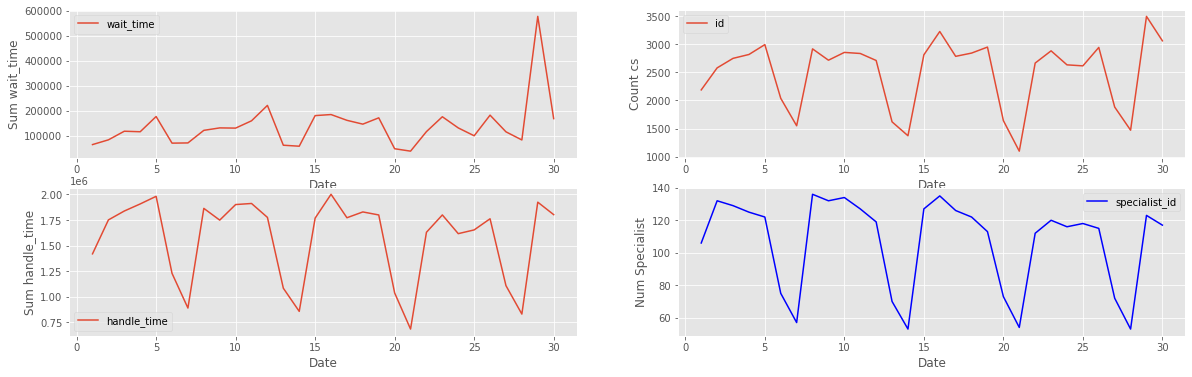

In [138]:
# df to cs, wait_time, handle_time and specialist_id graphics
df_line = df.groupby(['day']).agg({
    'id': "count",'wait_time': "sum",'handle_time': "sum",'specialist_id': "nunique"
    })

fig = plt.figure() # create figure

ax0 = fig.add_subplot(2, 2, 1) # add subplot 1
ax1 = fig.add_subplot(2, 2, 2) # add subplot 2
ax2 = fig.add_subplot(2, 2, 3) # add subplot 3 
ax3 = fig.add_subplot(2, 2, 4) # add subplot 4 

# Subplot 1: Line plot
df_line.plot(kind='line',y='wait_time', figsize=(20, 6), ax=ax0) # add to subplot 1
#ax1.set_title (1)
ax0.set_ylabel('Sum wait_time')
ax0.set_xlabel('Date')

# Subplot 2: Line plot
df_line.plot(kind='line',y='id', figsize=(20, 6), ax=ax1) # add to subplot 3
#ax1.set_title (1)
ax1.set_ylabel('Count cs')
ax1.set_xlabel('Date')

# Subplot 3: Line plot
df_line.plot(kind='line',y='handle_time', figsize=(20, 6), ax=ax2) # add to subplot 3
#ax2.set_title (2)
ax2.set_ylabel('Sum handle_time')
ax2.set_xlabel('Date')


# Subplot 4: Line plot
df_line.plot(kind='line',  y='specialist_id', color="blue", figsize=(20, 6), ax=ax3) # add to subplot 2
#ax3.set_title (3)
ax3.set_ylabel('Num Specialist')
ax3.set_xlabel('Date')

plt.show()

In [139]:
#  describe () wait time, handle time and specialist group by day
df_day.describe()

id      wait_time               handle_time              \
             count            sum        mean           sum        mean   
count    30.000000      30.000000   30.000000  3.000000e+01   30.000000   
mean   2500.466667  138626.900000   52.718044  1.572855e+06  713.503010   
std     619.276983   95841.569254   24.344256  3.988074e+05   23.033957   
min    1096.000000   38040.000000   29.117683  6.849950e+05  672.388218   
25%    2076.500000   82950.750000   41.149495  1.276972e+06  695.037175   
50%    2735.500000  125747.000000   48.952200  1.765460e+06  710.408379   
75%    2879.000000  170564.250000   58.021761  1.835830e+06  733.592491   
max    3501.000000  577153.000000  164.853756  2.001496e+06  754.722069   

      specialist_id  
            nunique  
count     30.000000  
mean     107.100000  
std       28.122086  
min       53.000000  
25%       82.750000  
50%      118.500000  
75%      126.750000  
max      136.000000

**Table 2**: time analysis and specialist by weekday

In [140]:
# wait time, handle time and specialist group by weekday
df_weekday = df.groupby(['weekday']).agg({
    'id': "count",'wait_time': [sum, 'mean'],'handle_time': [sum, 'mean'],'specialist_id': "nunique"
    })

df_weekday.head(100)

id  wait_time            handle_time             specialist_id
         count        sum       mean         sum        mean       nunique
weekday                                                                   
0        14094  1059232.0  75.154818   8607216.0  697.618415           192
1        14483   742710.0  51.288585   9104423.0  715.925375           188
2        11034   540430.0  48.978612   7128501.0  724.220360           184
3        11124   520785.0  46.845822   7301509.0  731.614128           186
4        11611   751007.0  64.691791   7319287.0  718.986935           182
5         7182   294984.0  41.078401   4460386.0  702.755002           163
6         5486   249659.0  45.524982   3264341.0  702.310886           130

In [141]:
# describe() wait time, handle time and specialist group by weekday
df_weekday.describe()

id     wait_time              handle_time              \
              count           sum       mean           sum        mean   
count      7.000000  7.000000e+00   7.000000  7.000000e+00    7.000000   
mean   10716.285714  5.941153e+05  53.366144  6.740809e+06  713.347300   
std     3329.460453  2.826712e+05  12.121402  2.127425e+06   12.726281   
min     5486.000000  2.496590e+05  41.078401  3.264341e+06  697.618415   
25%     9108.000000  4.078845e+05  46.185402  5.794444e+06  702.532944   
50%    11124.000000  5.404300e+05  48.978612  7.301509e+06  715.925375   
75%    12852.500000  7.468585e+05  57.990188  7.963252e+06  721.603647   
max    14483.000000  1.059232e+06  75.154818  9.104423e+06  731.614128   

      specialist_id  
            nunique  
count      7.000000  
mean     175.000000  
std       21.901294  
min      130.000000  
25%      172.500000  
50%      184.000000  
75%      187.000000  
max      192.000000

**Table 3**: time analysis and specialist by hour

In [142]:
# wait time, handle time and specialist group by hour
df_hour = df.groupby(['hour']).agg({
    'id': ['count'],'wait_time': [sum, 'mean'],'handle_time': [sum, 'mean'],'specialist_id': "nunique"
    })

df_hour.head(100)

id wait_time            handle_time             specialist_id
     count       sum       mean         sum        mean       nunique
hour                                                                 
4        3      13.0   4.333333      2683.0  894.333333             3
5     1174   46782.0  39.848382    831105.0  752.131222           106
6     2458   77172.0  31.396257   1683136.0  741.469604           140
7     3950  142285.0  36.021519   2686952.0  742.046948           171
8     4986  368000.0  73.806659   3222160.0  744.663739           175
9     5839  501415.0  85.873437   3738968.0  740.829800           178
10    6027  442020.0  73.339970   3892641.0  731.836999           179
11    5942  292972.0  49.321886   3841897.0  724.066528           179
12    5739  176590.0  30.775532   3819991.0  706.228693           188
13    6053  193615.0  31.997191   3958214.0  697.359760           190
14    5930  229365.0  38.691802   3749097.0  689.552511           182
15    5728  282274.0  49.279679   3580627.0  706.795697           178
16    5449  412365.0  75.746694   3154801.0  719.781200           166
17    4964  375779.0  75.700846   2934475.0  728.519116           162
18    4126  295407.0  71.613818   2391487.0  698.244380           145
19    3601  185557.0  51.543611   2191926.0  701.865514           134
20    2981  134426.0  45.094264   1499365.0  601.671348           119
21      64    2770.0  43.281250      6138.0  383.625000            10

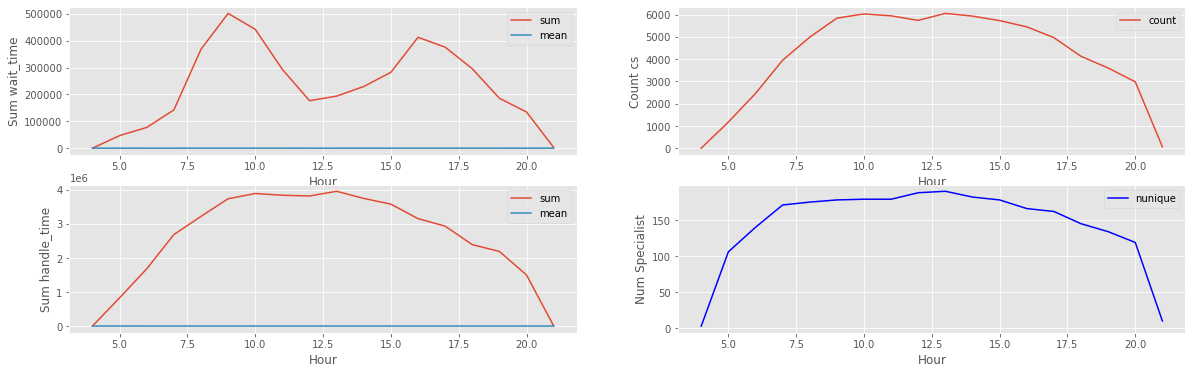

In [143]:
# df to cs, wait_time, handle_time and specialist_id graphics
df_line = df.groupby(['hour']).agg({
    'id': ['count'],'wait_time': [sum, 'mean'],'handle_time': [sum, 'mean'],'specialist_id': "nunique"
    })

fig = plt.figure() # create figure

ax0 = fig.add_subplot(2, 2, 1) # add subplot 1
ax1 = fig.add_subplot(2, 2, 2) # add subplot 2
ax2 = fig.add_subplot(2, 2, 3) # add subplot 3 
ax3 = fig.add_subplot(2, 2, 4) # add subplot 4 

# Subplot 1: Line plot
df_line.plot(kind='line',y='wait_time', figsize=(20, 6), ax=ax0) # add to subplot 1
#ax1.set_title (1)
ax0.set_ylabel('Sum wait_time')
ax0.set_xlabel('Hour')

# Subplot 2: Line plot
df_line.plot(kind='line',y='id', figsize=(20, 6), ax=ax1) # add to subplot 3
#ax1.set_title (1)
ax1.set_ylabel('Count cs')
ax1.set_xlabel('Hour')

# Subplot 3: Line plot
df_line.plot(kind='line',y='handle_time', figsize=(20, 6), ax=ax2) # add to subplot 3
#ax2.set_title (2)
ax2.set_ylabel('Sum handle_time')
ax2.set_xlabel('Hour')


# Subplot 4: Line plot
df_line.plot(kind='line',  y='specialist_id', color="blue", figsize=(20, 6), ax=ax3) # add to subplot 2
#ax3.set_title (3)
ax3.set_ylabel('Num Specialist')
ax3.set_xlabel('Hour')

plt.show()

In [144]:
# describe() wait time, handle time and specialist group by hour
df_hour.describe()

id      wait_time              handle_time              \
             count            sum       mean           sum        mean   
count    18.000000      18.000000  18.000000  1.800000e+01   18.000000   
mean   4167.444444  231044.833333  50.425896  2.621426e+06  705.834522   
std    2054.497598  150989.029344  21.433695  1.323918e+06   96.949565   
min       3.000000      13.000000   4.333333  2.683000e+03  383.625000   
25%    3136.000000  136390.750000  36.689090  1.810334e+06  699.149663   
50%    4975.000000  211490.000000  47.186971  3.044638e+06  721.923864   
75%    5814.000000  349851.750000  72.908432  3.746565e+06  741.309653   
max    6053.000000  501415.000000  85.873437  3.958214e+06  894.333333   

      specialist_id  
            nunique  
count     18.000000  
mean     144.722222  
std       55.714404  
min        3.000000  
25%      135.500000  
50%      168.500000  
75%      178.750000  
max      190.000000

**Table 4**: Channel Analysis

In [145]:
# channel by wait time, handle time and specialist
df_channel = df.groupby(['channel']).agg({
    'id': ['count'],'wait_time': [sum, 'mean'],'handle_time': [sum, 'mean'],'specialist_id': "nunique"
    })

df_channel.head()

id  wait_time            handle_time             specialist_id
         count        sum       mean         sum        mean       nunique
channel                                                                   
call      7900   219689.0  27.808734   1147795.0  145.290506            96
chat     67114  3939118.0  58.705186  46037868.0  791.667979           193

**Table 5**: CS_Tag Analysis

In [146]:
# cs_tag by wait time, handle time and specialist
df_tag = df.groupby(['cs_tag']).agg({
    'id': ['count'],'wait_time': [sum, 'mean'],'handle_time': [sum, 'mean'],'specialist_id': "nunique"
    })

df_tag.head()

id wait_time            handle_time              \
                count       sum       mean         sum        mean   
cs_tag                                                               
account_closure  1428   45183.0  31.640756   1127374.0  789.477591   
aml              1481   45497.0  30.720459   1033872.0  698.090479   
atm              1271   46263.0  36.398899   1138716.0  895.921322   
card_activation  2849  104506.0  36.681643   2198869.0  772.345978   
card_delivery    2597   93644.0  36.058529   2190297.0  843.395071   

                specialist_id  
                      nunique  
cs_tag                         
account_closure           183  
aml                       178  
atm                       175  
card_activation           184  
card_delivery             176

**Table 6**: Language Analysis

In [147]:
# contact_language by wait time, handle time and specialist
df_language = df.groupby(['contact_language']).agg({
    'id': ['count'],'wait_time': [sum, 'mean'],'handle_time': [sum, 'mean'],'specialist_id': "nunique"
    })

df_language.head()

id  wait_time             handle_time              \
                  count        sum        mean         sum        mean   
contact_language                                                         
de                10664   413216.0   38.759591   7046645.0  735.174231   
en                17008  1289191.0   75.816925  12874010.0  854.054000   
es                 5428   606843.0  111.819237   2815257.0  718.544410   
fr                27882  1175994.0   42.186612  18548806.0  743.975854   
it                 7748   535640.0   69.132679   4996615.0  792.107641   

                 specialist_id  
                       nunique  
contact_language                
de                          70  
en                         149  
es                          25  
fr                          91  
it                          31

**Table 7**: In House Analysis

In [148]:
# in house by wait time, handle time and specialist
df_inhouse = df.groupby(['is_inhouse']).agg({
    'id': ['count'],'wait_time': [sum, 'mean'],'handle_time': [sum, 'mean'],'specialist_id': "nunique"
    })

df_inhouse.head()

id  wait_time            handle_time             specialist_id
            count        sum       mean         sum        mean       nunique
is_inhouse                                                                   
False       44243  1688034.0  38.154559  32261179.0  729.874415           122
True        30771  2470773.0  80.329443  14924484.0  682.980231            80

In [149]:
df_inhouse.describe()

id     wait_time              handle_time              \
              count           sum       mean           sum        mean   
count      2.000000  2.000000e+00   2.000000  2.000000e+00    2.000000   
mean   37507.000000  2.079404e+06  59.242001  2.359283e+07  706.427323   
std     9526.142556  5.534801e+05  29.822146  1.225889e+07   33.159195   
min    30771.000000  1.688034e+06  38.154559  1.492448e+07  682.980231   
25%    34139.000000  1.883719e+06  48.698280  1.925866e+07  694.703777   
50%    37507.000000  2.079404e+06  59.242001  2.359283e+07  706.427323   
75%    40875.000000  2.275088e+06  69.785722  2.792701e+07  718.150869   
max    44243.000000  2.470773e+06  80.329443  3.226118e+07  729.874415   

      specialist_id  
            nunique  
count      2.000000  
mean     101.000000  
std       29.698485  
min       80.000000  
25%       90.500000  
50%      101.000000  
75%      111.500000  
max      122.000000

**Table 8**: Specialist Analysis

In [150]:
# specialist by wait time, handle time
df_specialist = df.groupby(['specialist_id']).agg({
    'id': "count",'agent_satisfaction': "mean", 'csat': "mean",'wait_time': "mean", 'handle_time': "mean"
    })

df_specialist.head()

,id,agent_satisfaction,csat,wait_time,handle_time
specialist_id,,,,,
s1,169,9.000000,9.000000,32.325444,907.461538
s10,329,7.608696,7.260870,29.264438,905.413374
s100,167,8.000000,7.666667,7.826347,546.862275
s101,276,9.272727,9.090909,14.992754,541.065217
s102,179,8.875000,7.937500,57.581006,693.731844


In [151]:
df_specialist.describe()

,id,agent_satisfaction,csat,wait_time,handle_time
count,202.000000,190.000000,190.000000,202.000000,201.000000
mean,371.356436,8.472730,8.126578,39.209192,715.880569
std,630.019072,0.773572,0.822195,30.678614,217.221334
min,1.000000,6.000000,5.333333,0.000000,9.425641
25%,192.000000,7.982558,7.652592,24.038442,600.423313
50%,329.500000,8.522321,8.193064,31.915091,729.603681
75%,454.750000,8.990385,8.607685,44.143654,847.691023
max,8901.000000,10.000000,10.000000,274.107692,1453.000000


**Table 9**: Survey x Date

In [152]:
# # date by agent_satisfaction
df_date = df.groupby(['day']).agg({
    'id': "count",'agent_satisfaction': "mean", 'csat': "mean"
    })

df_date.head(30)

,id,agent_satisfaction,csat
day,,,
1,2189,8.562874,8.197605
2,2582,8.404372,8.147541
3,2752,8.504167,8.083333
4,2821,8.366667,8.052381
5,2997,8.200000,7.747826
6,2039,8.167665,7.826347
7,1549,8.607143,8.276786
8,2921,8.354430,8.008439
9,2719,8.483092,8.096618


In [153]:
df_date.describe()

,id,agent_satisfaction,csat
count,30.000000,30.000000,30.000000
mean,2500.466667,8.422362,8.096720
std,619.276983,0.184564,0.186170
min,1096.000000,7.952381,7.732143
25%,2076.500000,8.279640,7.994933
50%,2735.500000,8.413195,8.094181
75%,2879.000000,8.562632,8.195282
max,3501.000000,8.772358,8.449367


**Table 10**: Survey x Weekday

In [154]:
# weekday by agent_satisfaction
df_weekday = df.groupby(['weekday']).agg({
    'id': "count",'agent_satisfaction': "mean", 'csat': "mean"
    })

df_weekday.head(7)

,id,agent_satisfaction,csat
weekday,,,
0,14094,8.490622,8.104640
1,14483,8.296875,7.956250
2,11034,8.408673,8.077530
3,11124,8.351477,8.111975
4,11611,8.383041,8.058480
5,7182,8.434783,8.100334
6,5486,8.571046,8.227882


**Table 11**: Survey x Hour

In [155]:
# hour by agent_satisfaction
df_hour = df.groupby(['hour']).agg({
    'id': "count",'agent_satisfaction': "mean", 'csat': "mean"
    })

df_hour.head(100)

,id,agent_satisfaction,csat
hour,,,
4,3,NaN,NaN
5,1174,8.709091,8.454545
6,2458,8.488479,8.087558
7,3950,8.473354,8.203762
8,4986,8.219718,7.957746
9,5839,8.375887,7.971631
10,6027,8.236453,8.002463
11,5942,8.423174,8.030227
12,5739,8.554622,8.140056


In [156]:
df_date.describe()

,id,agent_satisfaction,csat
count,30.000000,30.000000,30.000000
mean,2500.466667,8.422362,8.096720
std,619.276983,0.184564,0.186170
min,1096.000000,7.952381,7.732143
25%,2076.500000,8.279640,7.994933
50%,2735.500000,8.413195,8.094181
75%,2879.000000,8.562632,8.195282
max,3501.000000,8.772358,8.449367


**Table 12**: Survey x Channel

In [157]:
# channel by aggent_satisfaction
df_channel = df.groupby(['channel']).agg({
    'id': "count",'agent_satisfaction': "mean", 'csat': "mean"
    })

df_channel.head(100)

,id,agent_satisfaction,csat
channel,,,
call,7900,9.179894,8.947090
chat,67114,8.378071,8.041503


**Table 13**: Survey x CS Tag

In [158]:
# Sctag by agent_satisfation
df_cstag = df.groupby(['cs_tag']).agg({
    'id': "count",'agent_satisfaction': "mean", 'csat': "mean"
    })

df_cstag.head(100)

,id,agent_satisfaction,csat
cs_tag,,,
account_closure,1428,7.200000,6.413333
aml,1481,NaN,NaN
atm,1271,8.527132,8.248062
card_activation,2849,9.022989,8.758621
card_delivery,2597,8.454545,8.152893
card_reorder,2364,9.081851,8.690391
chargeback,2912,8.216867,7.909639
chat/call_problems,4814,6.478261,7.130435
confirmations/statements,2493,9.006689,8.812709


**Table 14**: Survey x Language

In [159]:
# contact_language by agent_satisfaction
df_language = df.groupby(['contact_language']).agg({
    'id': "count",'agent_satisfaction': "mean", 'csat': "mean"
    })

df_language.head(100)

,id,agent_satisfaction,csat
contact_language,,,
de,10664,8.555276,8.115578
en,17008,8.675836,8.397026
es,5428,7.804124,7.532646
fr,27882,8.353755,8.015810
it,7748,8.112676,7.788732


**Table 15**: Survey x In House

In [160]:
# in_house by agent_satisfaction
df_language = df.groupby(['is_inhouse']).agg({
    'id': "count",'agent_satisfaction': "mean", 'csat': "mean"
    })

df_language.head(100)

,id,agent_satisfaction,csat
is_inhouse,,,
False,44243,8.405067,8.072588
True,30771,8.415405,8.082291


<h2>1. Customer Service Overview</h2>

**A**. You'll first want to give a *high-level* overview of what happened in Customer Service, based on the given data. Pick a set of (at least 3) KPIs you deem appropriate and visualise their development. *Hint:* In this sub-task, restrict yourself to **contacts, specialists, surveys**.

### 1.1 Average Service Time (AST)
The Average Service Time aims to measure the average duration of interactions with customers. That is, it is accounted for from the moment the service begins until its completion, also considering transfers and waiting intervals.

Therefore, to arrive at the result of your team's TMA, you must divide the total time of calls in a given period by the number of calls made in that same interval. The formula looks like this:

time of calls ÷ number of calls = TMA

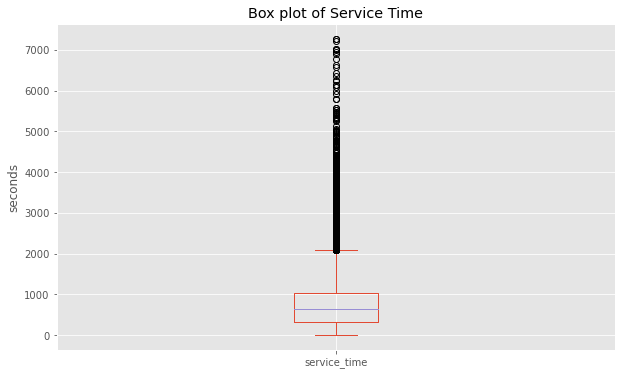

In [161]:
#df_specialist = df.groupby('specialist_id')[['wait_time']].mean()
df['service_time'].plot(kind='box', figsize=(10, 6))

plt.title('Box plot of Service Time')
plt.ylabel('seconds')

plt.show()

In [162]:
df[["service_time"]].describe()

,service_time
count,66053.000000
mean,755.546379
std,613.376504
min,0.000000
25%,325.000000
50%,630.000000
75%,1027.000000
max,7281.000000


### 1.2 Average Waiting Time (AWT)
The Average Waiting Time, on the other hand, helps to identify how long a customer waited in line to be served, regardless of the communication channel.

According to our report, more than 55% of consumers find that waiting long periods to interact with an agent is frustrating and makes for a poor experience.

Therefore, this is a very important customer service indicator that must be monitored and optimized frequently. Its calculation can be done as follows:

total wait time ÷ number of answered calls = AWT

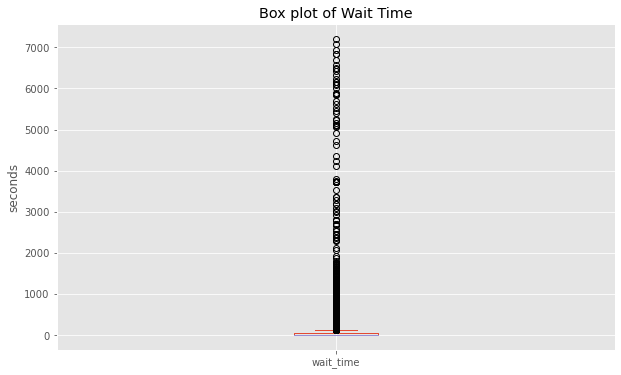

In [163]:
#df_specialist = df.groupby('specialist_id')[['wait_time']].mean()
df['wait_time'].plot(kind='box', figsize=(10, 6))

plt.title('Box plot of Wait Time')
plt.ylabel('seconds')

plt.show()

In [164]:
df[["wait_time"]].describe()

,wait_time
count,75000.000000
mean,55.450760
std,181.312835
min,0.000000
25%,4.000000
50%,5.000000
75%,53.000000
max,7212.000000


### 1.3 Average Customer Satisfaction Score (ACSAT) and Agent Satisfaction (AAS)
The CSAT, or Customer Satisfaction Score, is used to measure how satisfied a person was with service.

This indicator is usually presented after customer support in a questionnaire format. It can be measured by grades (from 1 to 10, with 10 being very satisfied), by percentage (from 0% to 100%), or by perception scale (satisfied, dissatisfied, etc).

Therefore, the calculation to obtain the result depends on the methodology used. However, in general, the formula consists of adding the answers, following the defined value scale, and dividing by the total number of feedbacks.

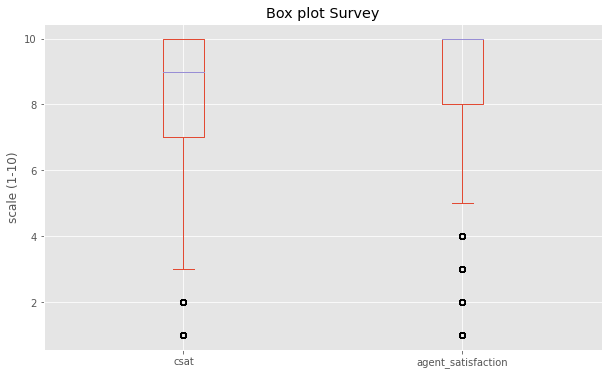

In [165]:
#df_specialist = df.groupby('specialist_id')[['wait_time']].mean()
df[['csat','agent_satisfaction']].plot(kind='box', figsize=(10, 6))

plt.title('Box plot Survey')
plt.ylabel('scale (1-10)')

plt.show()

In [166]:
df[["csat","agent_satisfaction"]].describe()

,csat,agent_satisfaction
count,5032.000000,5032.000000
mean,8.075517,8.408188
std,2.792047,2.698586
min,1.000000,1.000000
25%,7.000000,8.000000
50%,9.000000,10.000000
75%,10.000000,10.000000
max,10.000000,10.000000


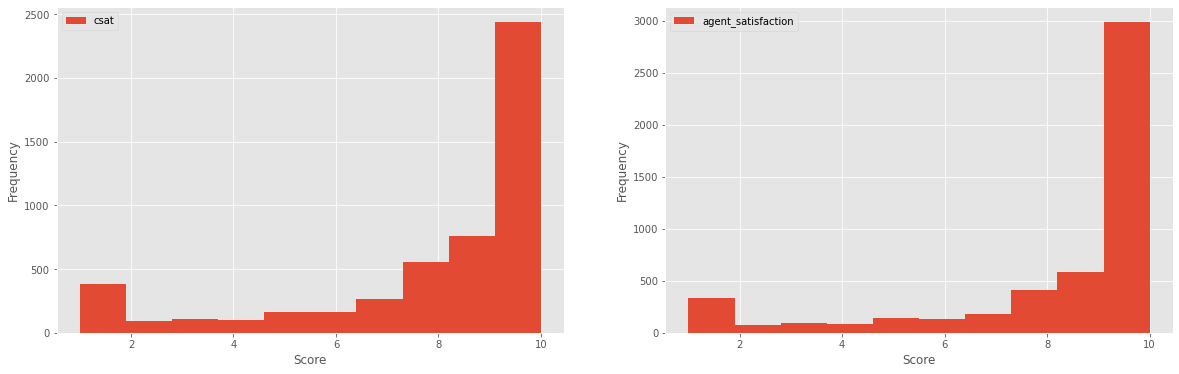

In [167]:
# df to cs, wait_time, handle_time and specialist_id graphics

fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2


# Subplot 1: Line plot
df.plot(kind='hist',y='csat', figsize=(20, 6), ax=ax0) # add to subplot 1
#ax0.set_ylabel('Scala')
ax0.set_xlabel('Score')

# Subplot 2: Line plot
df.plot(kind='hist',y='agent_satisfaction', figsize=(20, 6), ax=ax1) # add to subplot 3
#ax1.set_ylabel('agent_satisfaction')
ax1.set_xlabel('Score')

plt.show()

**B**. As we need to communicate to Workforce (WF) Management how much resources will be needed in the future, please determine how many members of staff will be needed per day of the week for the next 7 days after the last day in the dataset. You don't need to separate external and internal specialists as this will be done by the WF Manager.

In [168]:
# specialist group by week
df_weekday = df.groupby(['week']).agg({
    'specialist_id': "nunique"
    })

df_weekday.head(100)

,specialist_id
week,
23,180
24,180
25,178
26,175
27,145


In [169]:
# specialist group by week
df_weekday = df.groupby(['weekday']).agg({
    'specialist_id': "nunique"
    })

df_weekday.head(100)

,specialist_id
weekday,
0,192
1,188
2,184
3,186
4,182
5,163
6,130


In [170]:
# specialist group by weekday
df_weekday = df.groupby(['week','weekday']).agg({
    'specialist_id': "nunique"
    })

df_weekday.head(100)

specialist_id
week weekday               
23   0                  106
     1                  132
     2                  129
     3                  125
     4                  122
     5                   75
     6                   57
24   0                  136
     1                  132
     2                  134
     3                  127
     4                  119
     5                   70
     6                   53
25   0                  127
     1                  135
     2                  126
     3                  122
     4                  113
     5                   73
     6                   54
26   0                  112
     1                  120
     2                  116
     3                  118
     4                  115
     5                   72
     6                   53
27   0                  123
     1                  117

In [171]:
# specialist group by weekday
df_mean = df_weekday.groupby(['weekday']).agg({
    'specialist_id': "mean"
    })

df_mean.head(7)

,specialist_id
weekday,
0,120.80
1,127.20
2,126.25
3,123.00
4,117.25
5,72.50
6,54.25


<h2>2. CS Specialists</h2>


Create weekly leaderboards: breakdown per week for the top 5 inhouse CS specialists with respect to 3 KPIs that you think are suitable for measuring specialist performance. Plot the leaderboards showing full names and scores. 

*Notes: Let's say a week starts on Monday and has 7 days. Let's only consider weeks that are entirely contained in the dataset.*

In [172]:
df_er= df[df['is_inhouse']==1]

In [173]:
def top5(w):
    df_nweek= df_er[df_er['week']==w]
    df_top = df_nweek.groupby(df['specialist_id']).agg({
        'agent_satisfaction': "mean", 'csat': "mean",'wait_time': "mean", 'service_time': "mean"
        })
    df_top = pd.merge(df_top, df_specialists[['id','full_name']],
    left_on='specialist_id', right_on='id', how='left')

    df_top5=df_top.sort_values(by=['agent_satisfaction','csat','service_time','wait_time'], 
        ascending=[False, False, True, True],ignore_index=True).head()
    
    print ("Top5 Specialist: week", w)
    print(df_top5[['full_name','agent_satisfaction','csat','service_time','wait_time']])
    print ("")

In [174]:
for w in range(23, 27):
    top5(w)

Top5 Specialist: week 23
         full_name  agent_satisfaction  csat  service_time  wait_time
0    Lindsay Lohan                10.0  10.0    412.385714  12.057143
1      Chris Pratt                10.0  10.0    488.315789   3.894737
2            Drake                10.0  10.0    852.204545  25.022727
3   George Clooney                10.0  10.0   1064.969697  30.590909
4  Ellen DeGeneres                10.0  10.0   1144.466667  11.433333

Top5 Specialist: week 24
             full_name  agent_satisfaction  csat  service_time   wait_time
0  Chad Michael Murray                10.0  10.0    381.666667  112.904762
1       Jennifer Lopez                10.0  10.0    397.242424    6.303030
2         Cameron Diaz                10.0  10.0    775.382716   43.962963
3         Paris Hilton                10.0  10.0    814.827586   21.206897
4    Jennifer Lawrence                10.0  10.0    882.867470   30.096386

Top5 Specialist: week 25
          full_name  agent_satisfaction  csat  servic

#### Thank you!!